In [42]:
import pandas as pd

Data Preprocessing

In [43]:
df = pd.read_csv('cars.csv')

In [44]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [46]:
#Encode categorical columns into numbers
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in df.columns:
  labelencoder = LabelEncoder()
  df[col] = labelencoder.fit_transform(df[col])
  # store encoder for later use
  encoders[col] = labelencoder

In [47]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [48]:
#Split features(X) and target(y)

X = df.drop('class', axis=1)
y = df['class']

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Training of the model

In [50]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

In [51]:
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [52]:
y_pred = model.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [54]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9675925925925926

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       103
           1       0.70      0.93      0.80        15
           2       0.98      1.00      0.99       294
           3       0.95      0.95      0.95        20

    accuracy                           0.97       432
   macro avg       0.90      0.94      0.92       432
weighted avg       0.97      0.97      0.97       432



Visualization

In [56]:
import seaborn as sn
import matplotlib.pyplot as plt

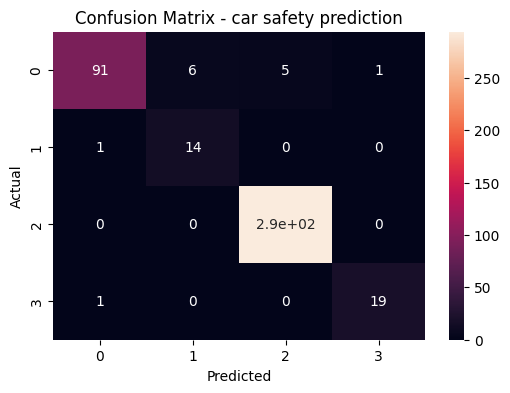

In [57]:
plt.figure(figsize=(6,4))
sn.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.title("Confusion Matrix - car safety prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

New data Prediction

In [58]:
new_data = pd.DataFrame({
  'buying' : ['high'],
  'maint' : ['low'],
  'doors' : ['4'],
  'persons' : ['more'],
  'lug_boot' : ['big'],
  'safety' : ['high']
})

In [59]:
#encode new data

encoded_new_data = new_data.copy()
for col in encoded_new_data.columns:
  encoded_new_data[col] = encoders[col].transform(new_data[col])

In [60]:
prediction = model.predict(encoded_new_data)[0]

In [61]:
#decode the predicted label back to its original category

predicted_label = encoders['class'].inverse_transform([prediction])[0]
predicted_label

'acc'